In [3]:
!pip install torchviz


/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=2c3c49b5c68a82528de3f65ce314e0767b4f56528ac34d5f20576bfd834546c1
  Stored in directory: /home/ubuntu/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
#mport cv2 as cv
import argparse
from torchvision import models, transforms
import new_network
from torchvision import utils


model = new_network.Net()
model_weights = []     # we will save the conv layer weights in this list
conv_layers = []       # we will save the conv layers in this list
#get all the model children as list
model_children = list(model.children())
# type(model_children[0][0])
# kernels = model.cnn_relu_block_1.weight.detach()
# fig, axarr = plt.subplots(kernels.size(0))
# for idx in range(kernels.size(0)):
#     axarr[idx].imshow(kernels[idx].squeeze())

counter = 0 
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            if type(model_children[i][j]) == nn.Conv2d:
                counter += 1
                model_weights.append(model_children[i][j].weight)
                conv_layers.append(model_children[i][j])
print(f"Total convolutional layers: {counter}")


Total convolutional layers: 7


In [15]:
l_model = torch.load("result/network.1620717073.2.3.2.pth")
l_model_weights = []     # we will save the conv layer weights in this list
l_conv_layers = []       # we will save the conv layers in this list
#get all the model children as list
l_model_children = list(l_model.children())

display(l_model)

l_counter = 0 
for i in range(len(l_model_children)):
    if type(l_model_children[i]) == nn.Conv2d:
        l_counter += 1
        l_model_weights.append(l_model_children[i].weight)
        l_conv_layers.append(l_model_children[i])
    elif type(l_model_children[i]) == nn.Sequential:
        for j in range(len(l_model_children[i])):
            if type(l_model_children[i][j]) == nn.Conv2d:
                l_counter += 1
                l_model_weights.append(l_model_children[i][j].weight)
                l_conv_layers.append(l_model_children[i][j])
print(f"Total convolutional layers: {l_counter}")

Network(
  (cnn_relu_stack): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(24, 96, kernel_size=(3, 3), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Dropout(p=0.35, inplace=False)
    (10): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1))
    (11): LeakyReLU(negative_slope=0.01)
    (12): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout2d(p=0.48, inplace=False)
    (15): Conv2d(192, 192, kernel_s

Total convolutional layers: 7


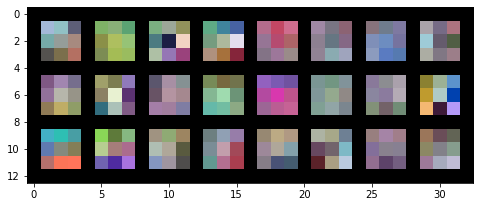

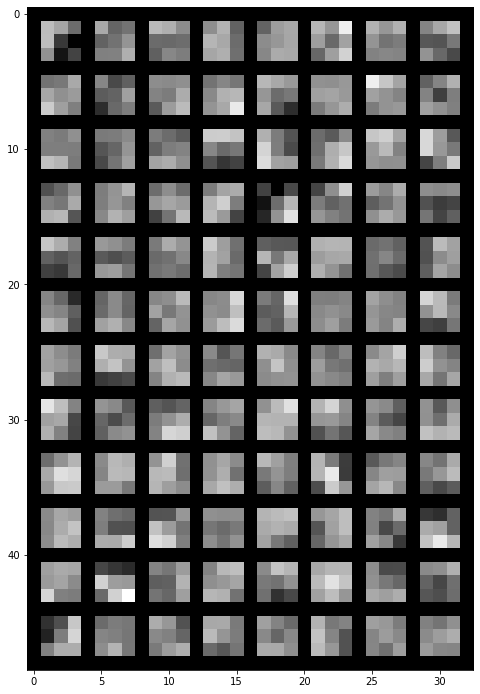

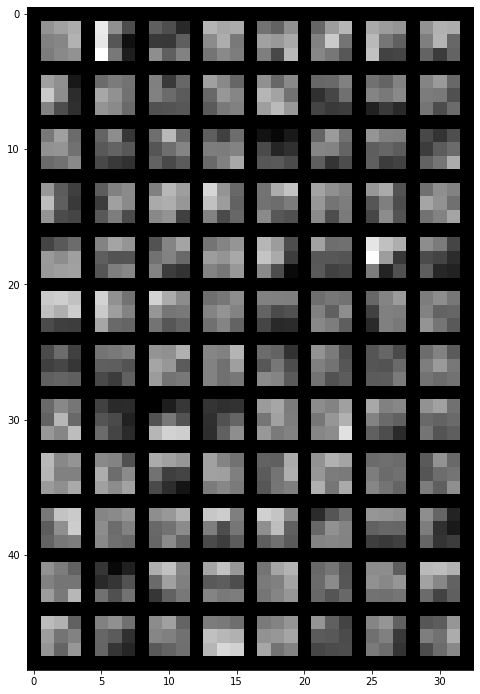

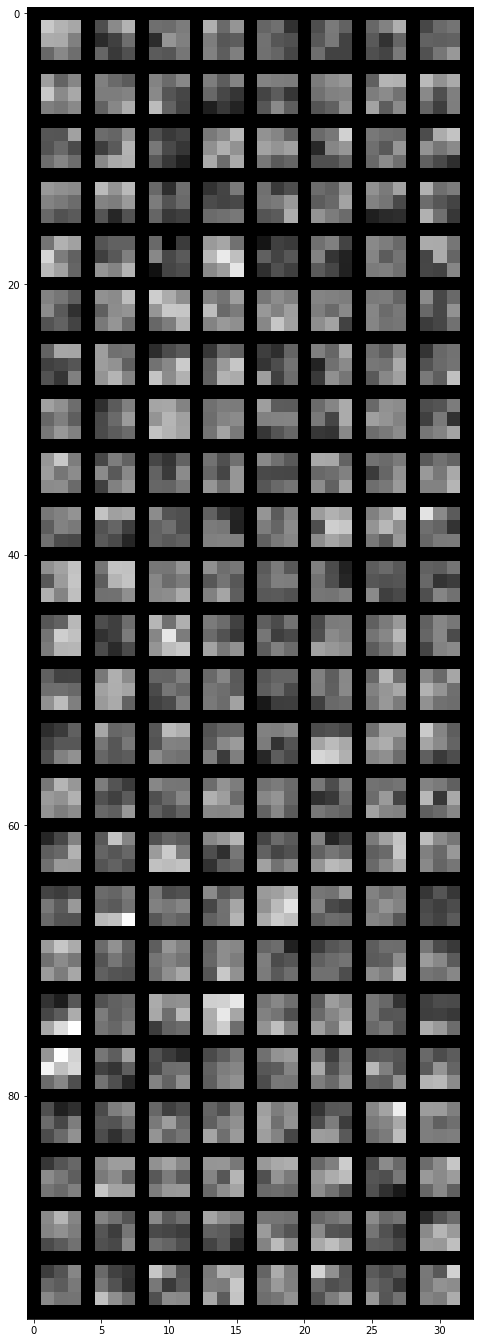

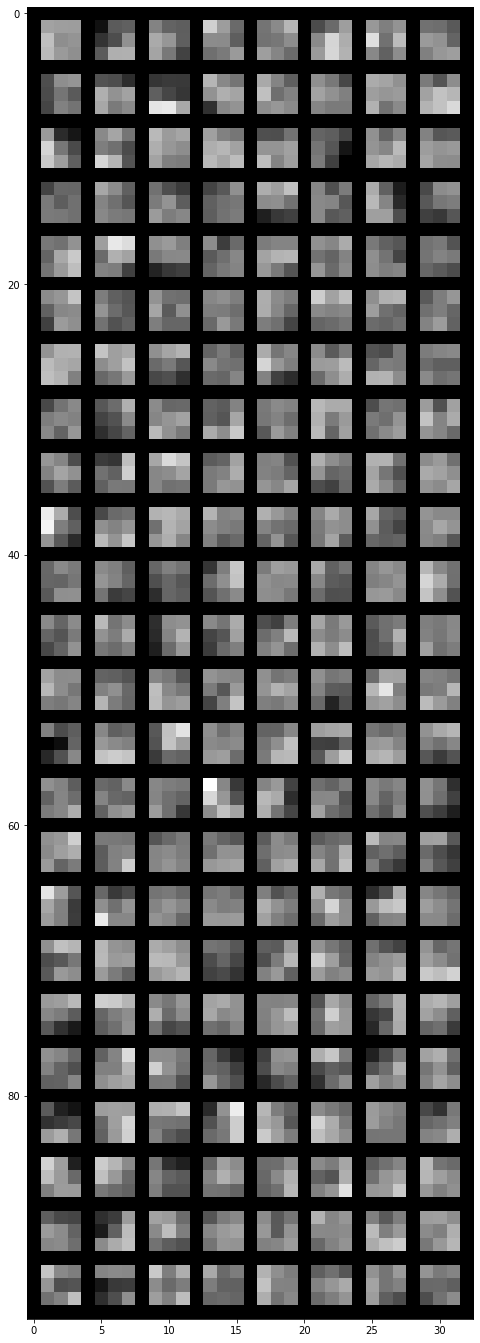

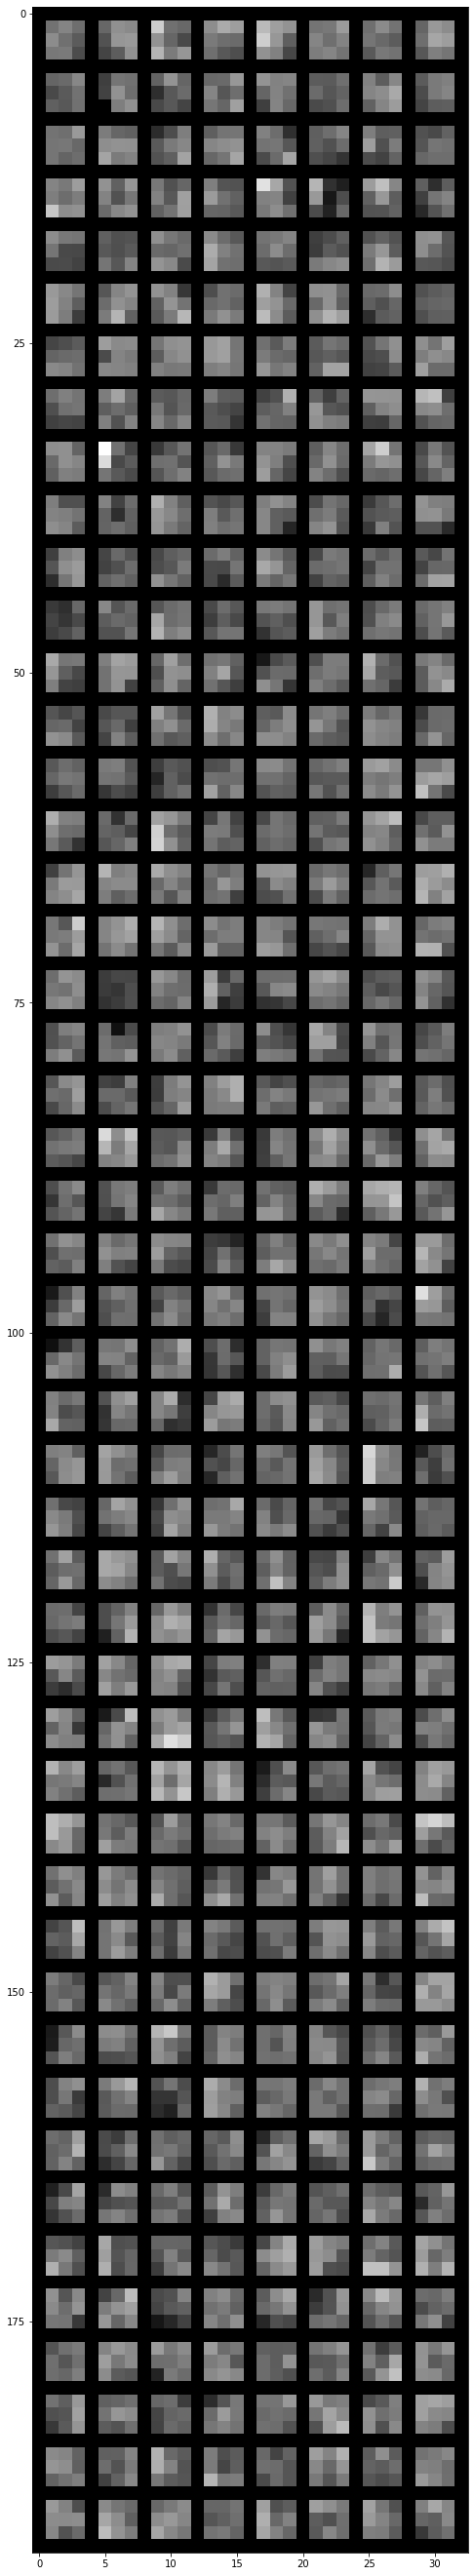

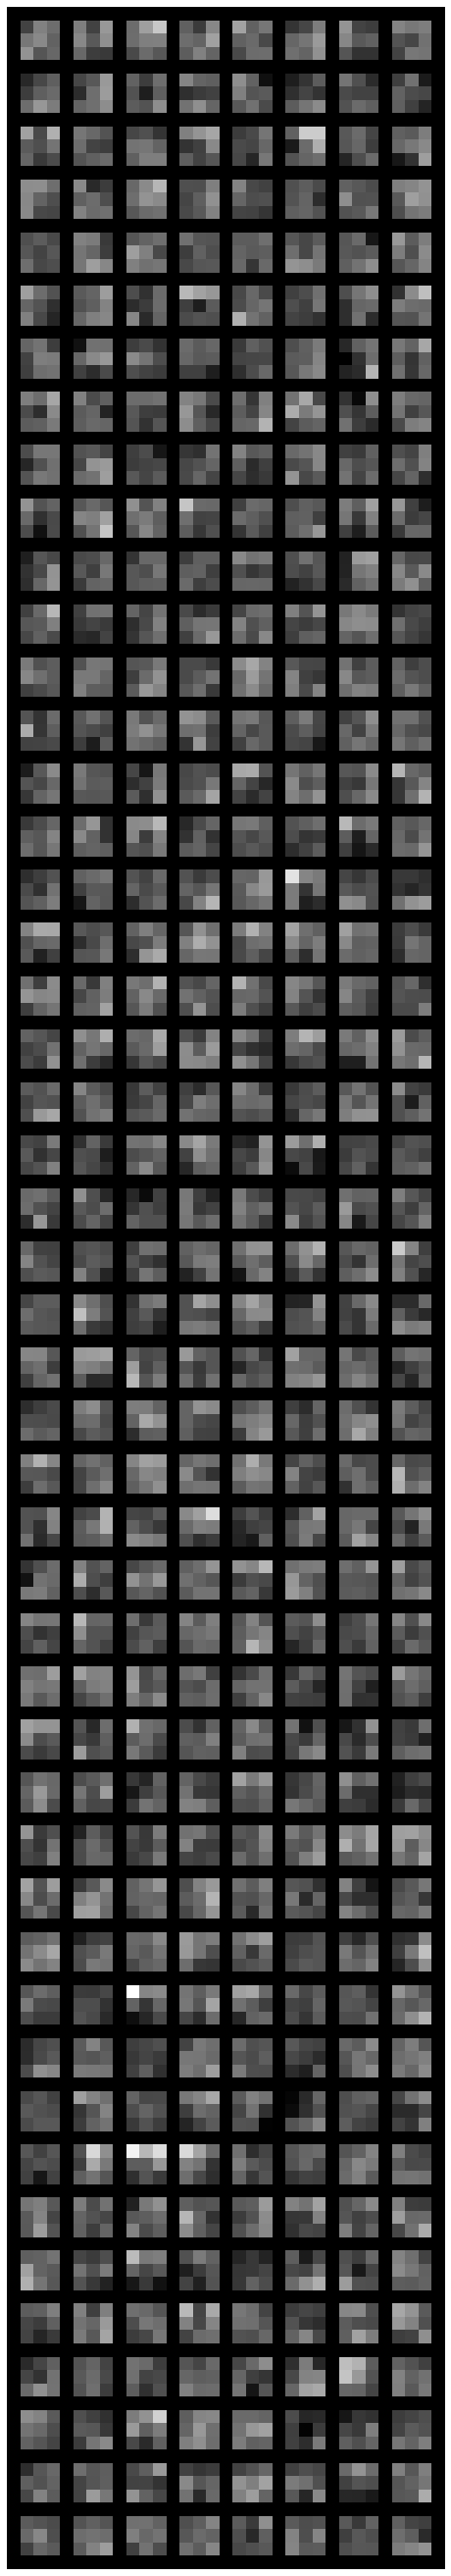

In [17]:
#method2 https://stackoverflow.com/questions/55594969/how-to-visualise-filters-in-a-cnn-with-pytorch
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
        n,c,h,w = tensor.shape

        if allkernels: tensor = tensor.view(n*c, -1, w, h)
        elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))    
        grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.detach().numpy().transpose((1, 2, 0)))


if __name__ == "__main__":
    for i in range(len(l_model_weights)):
        filter = l_model_weights[i]
        visTensor(filter.cpu(), ch=0, allkernels=False)

    plt.axis('off')
    plt.ioff()
    plt.show()

In [16]:
#method1:just for one image
#https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch/

# plt.figure(figsize=(20, 17))
# for i, filter in enumerate(model_weights[0]):
#     plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
#     plt.imshow(filter[0, :, :].detach(), cmap='gray')
#     plt.axis('off')
#     #plt.savefig('../outputs/filter.png')
# # plt.show())
# plt.show()

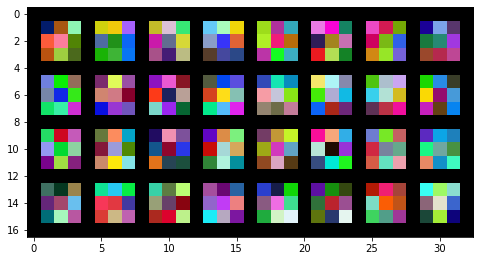

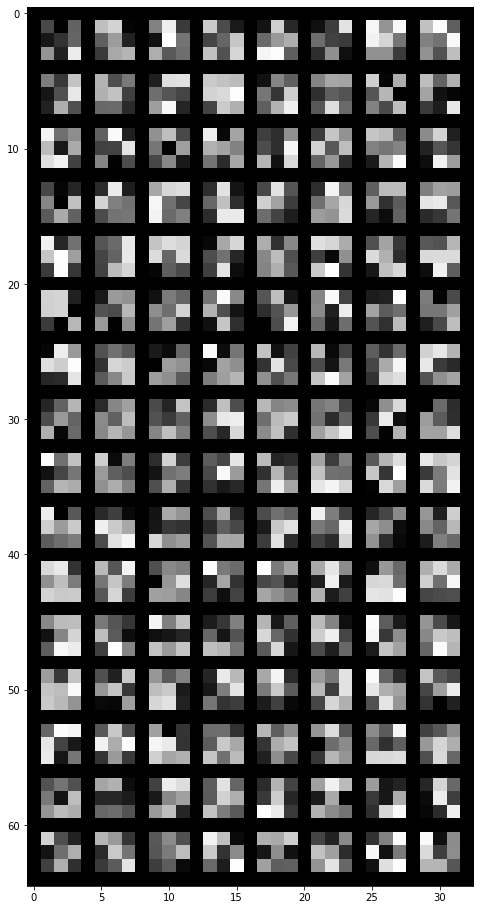

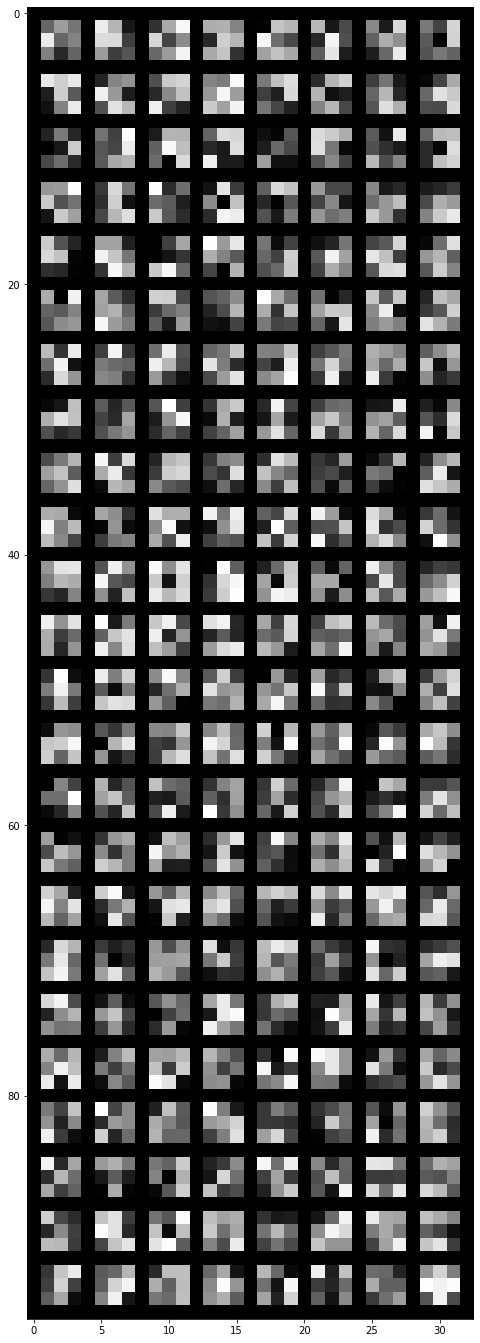

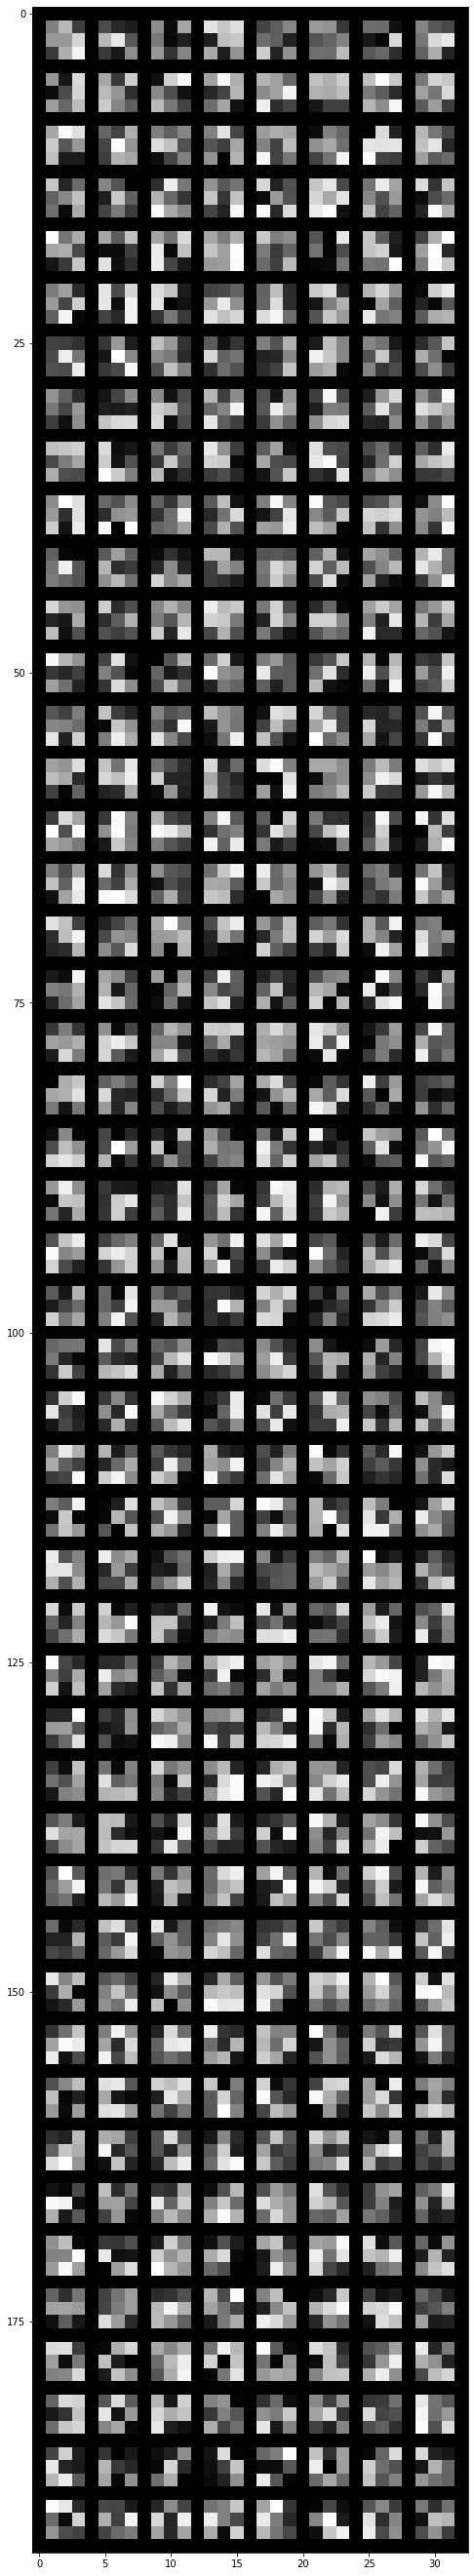

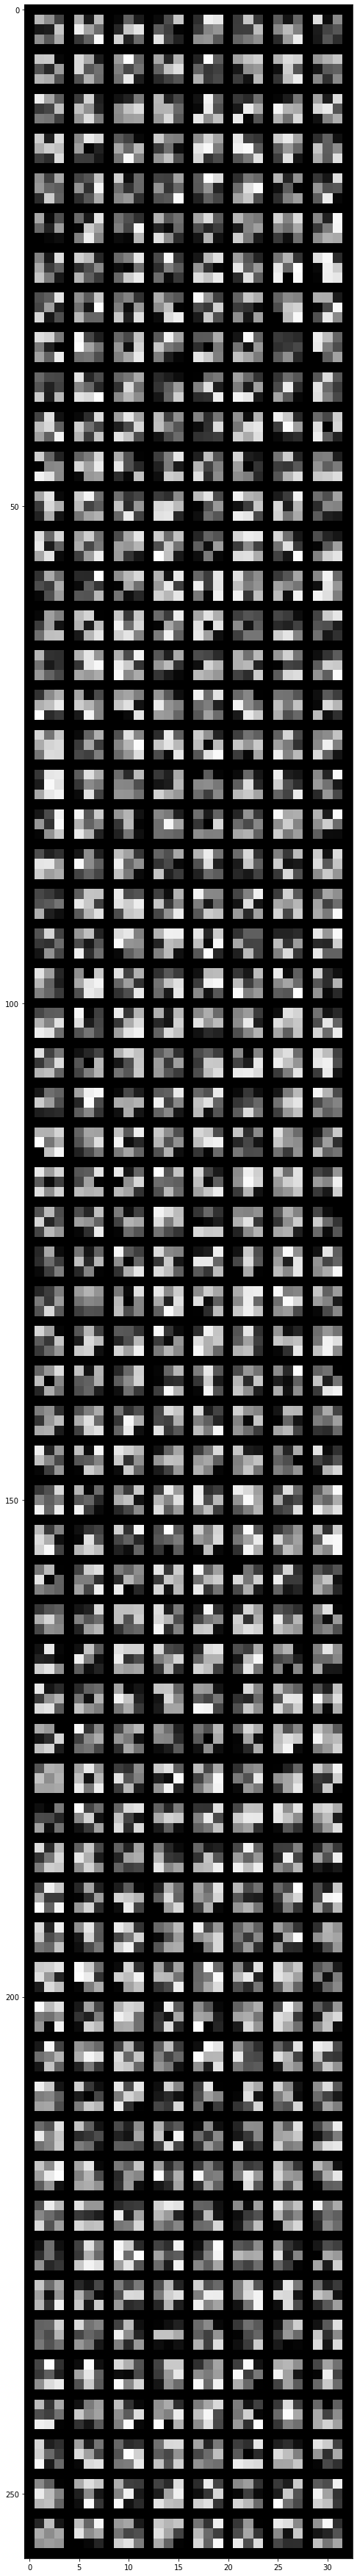

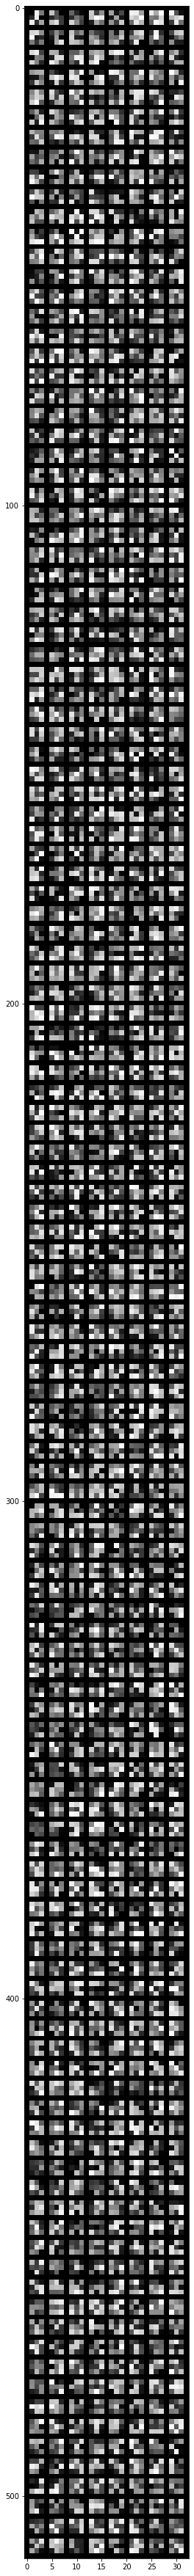

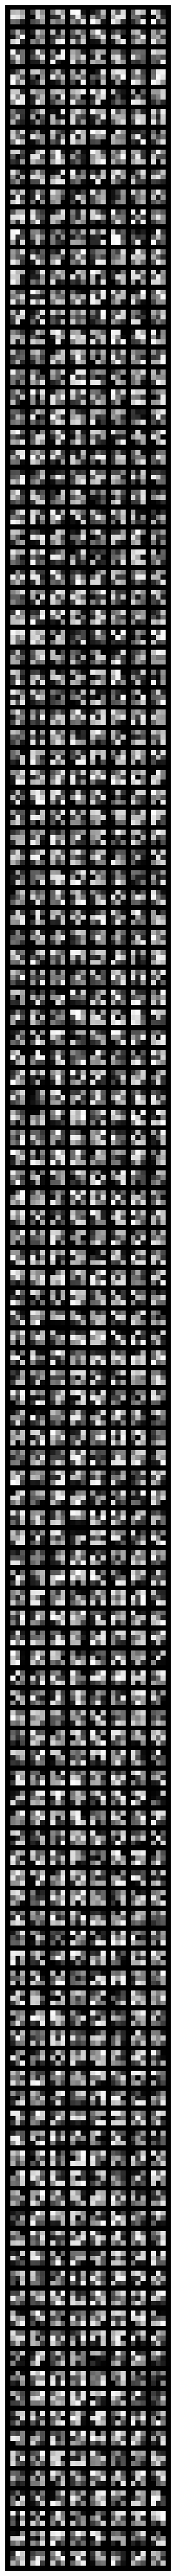

In [9]:
#method2 https://stackoverflow.com/questions/55594969/how-to-visualise-filters-in-a-cnn-with-pytorch
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
        n,c,w,h = tensor.shape

        if allkernels: tensor = tensor.view(n*c, -1, w, h)
        elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))    
        grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.detach().numpy().transpose((1, 2, 0)))


if __name__ == "__main__":
    for i in range(len(model_weights)):
        filter = model_weights[i]
    #print(filter.shape)
        visTensor(filter.cpu(), ch=0, allkernels=False)

    plt.axis('off')
    plt.ioff()
    plt.show()